Unique values in age_group: ['Adult' 'Senior' nan]
Unique values in RIAGENDR: [ 2.  1. nan]
Unique values in PAQ605: [ 2.  1. nan  7.]
Unique values in DIQ010: [ 2. nan  1.  3.]


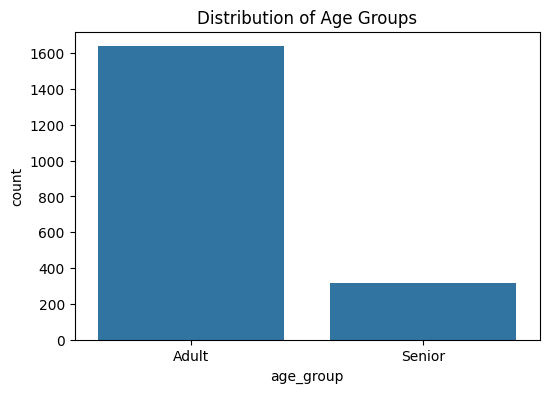

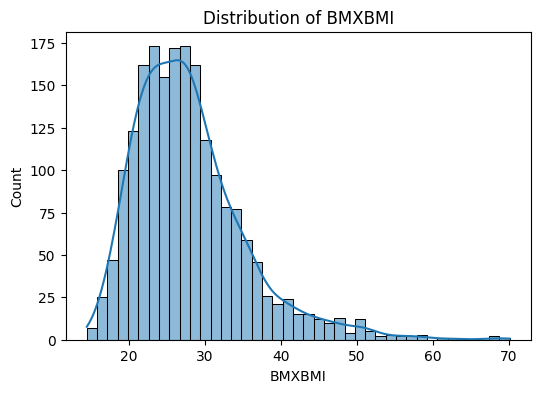

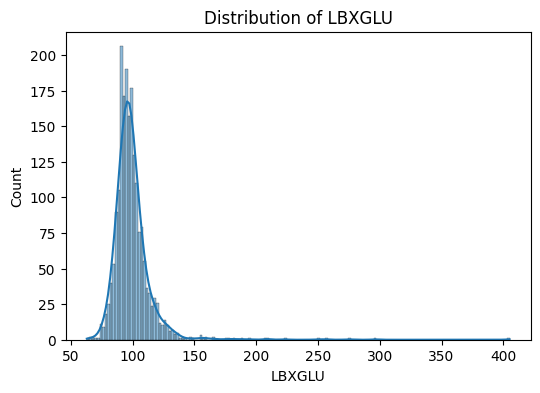

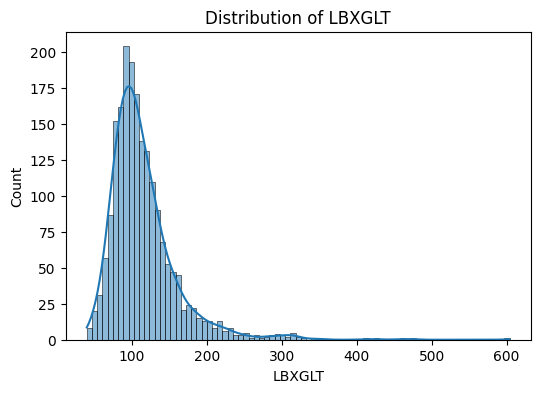

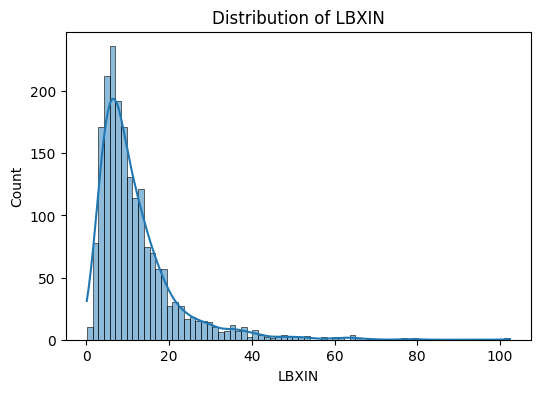

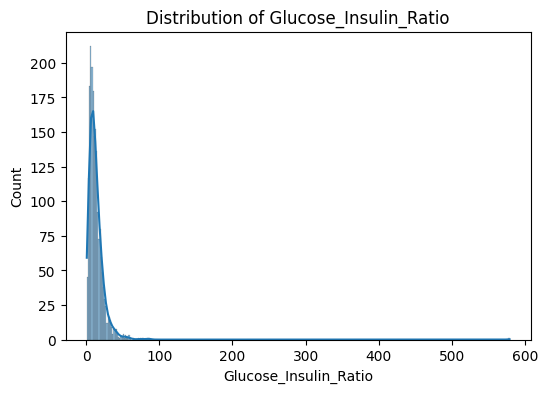

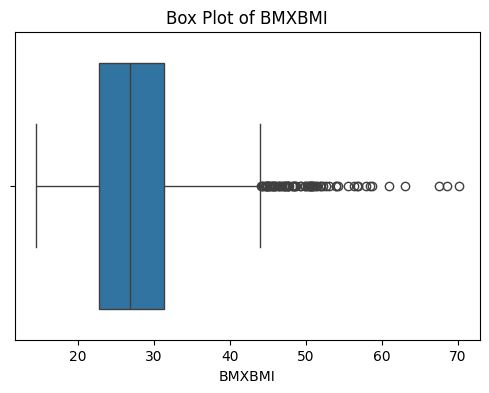

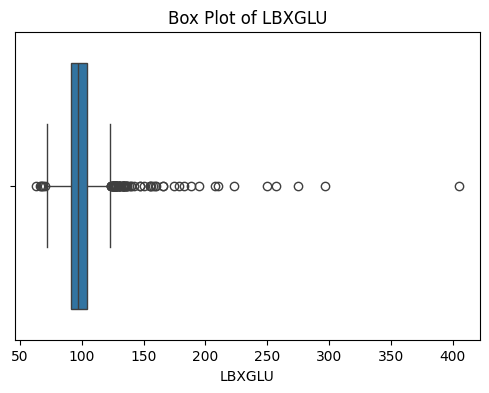

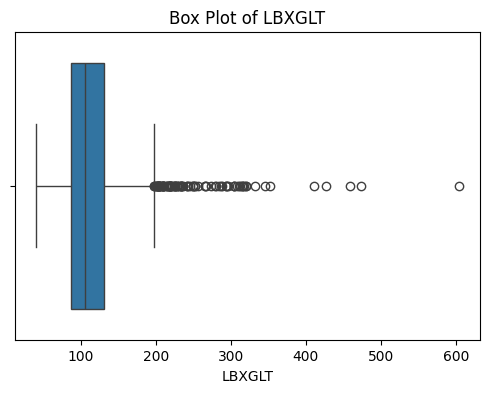

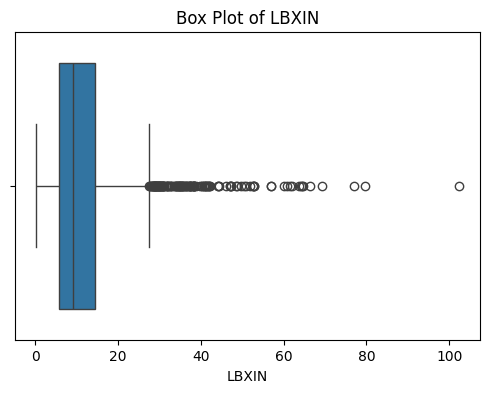

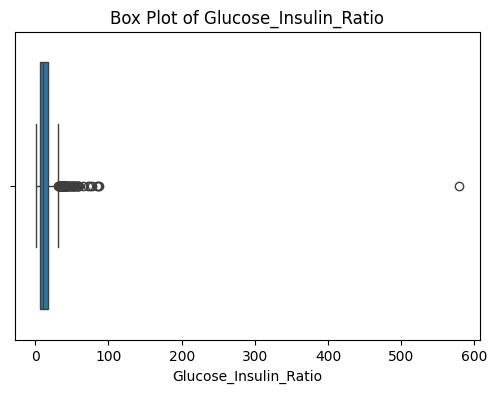

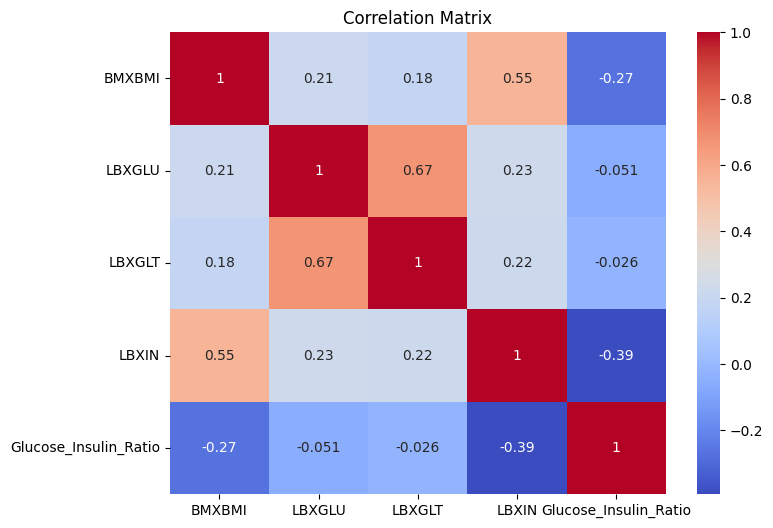

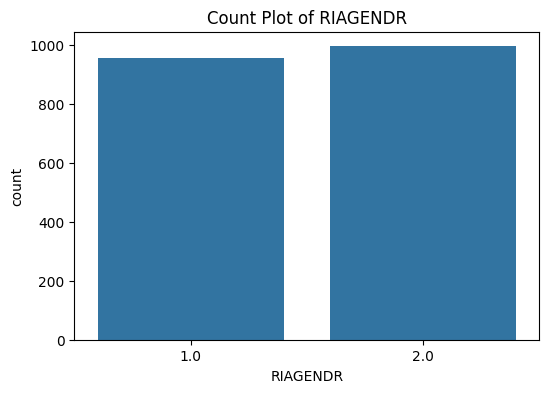

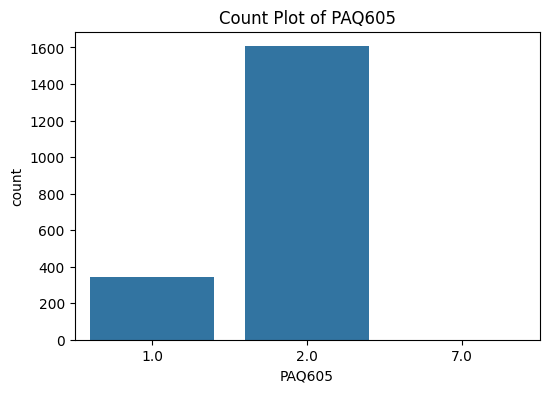

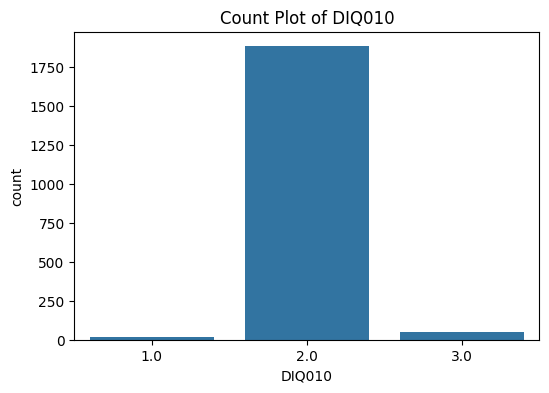

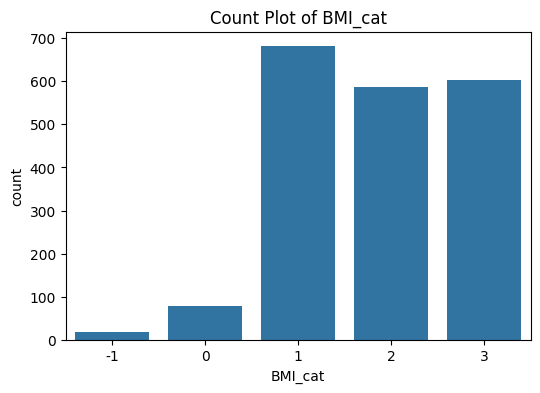

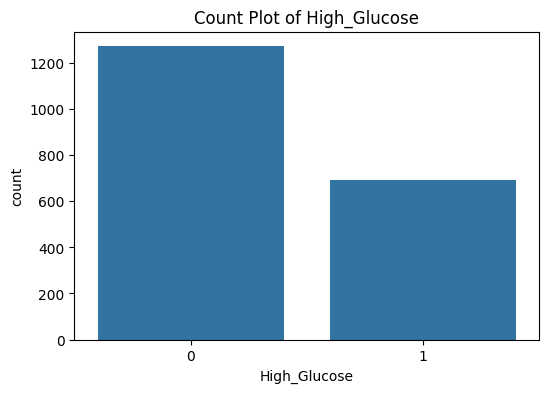

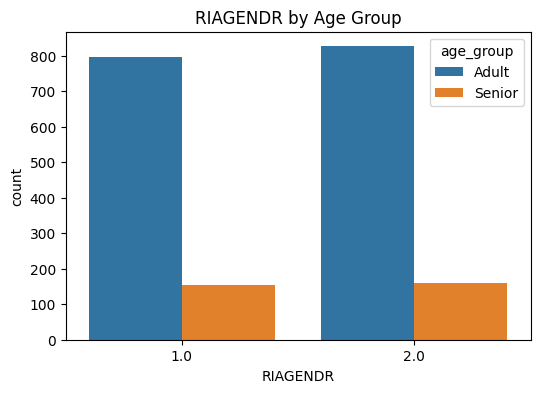

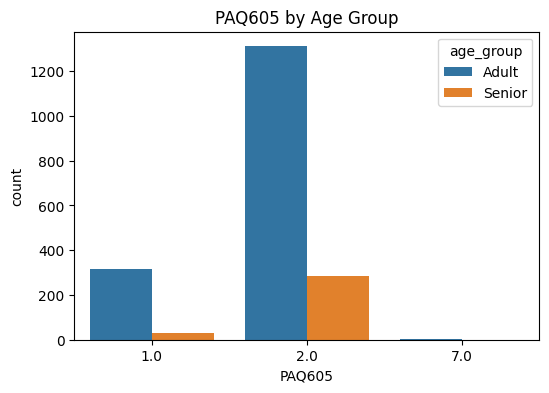

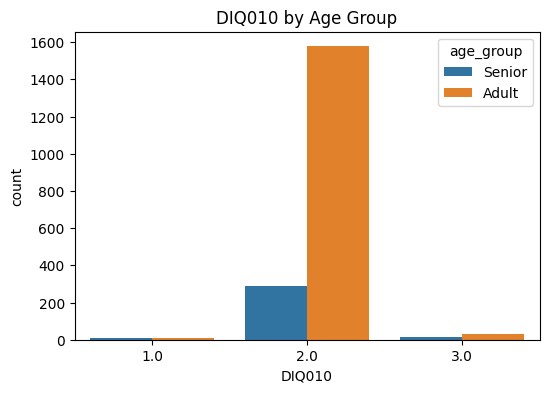

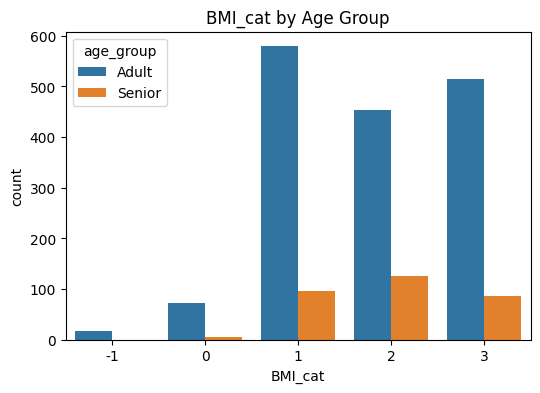

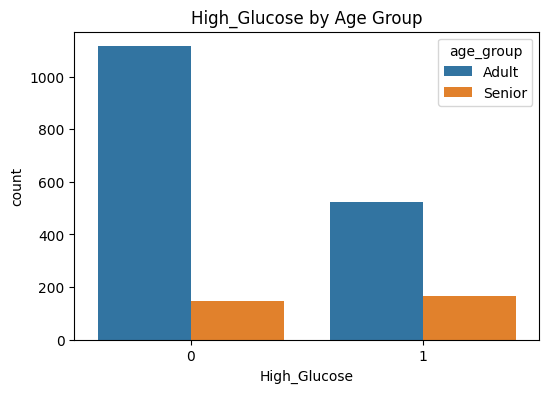

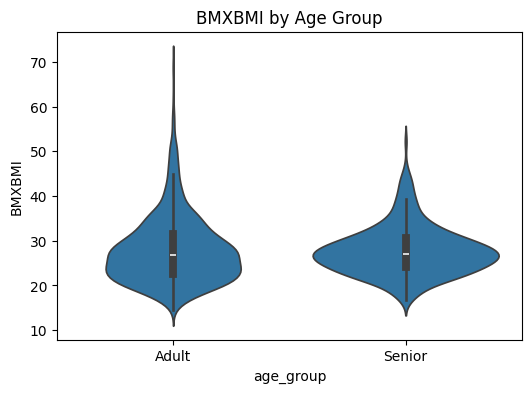

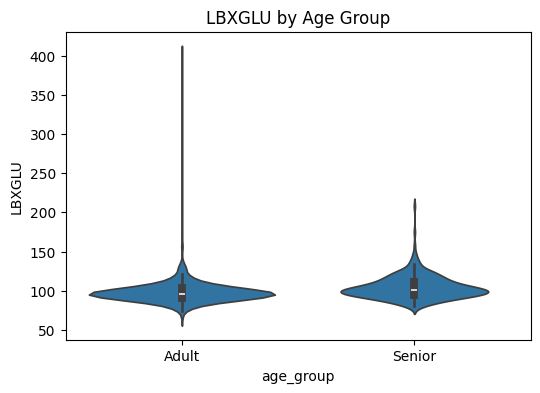

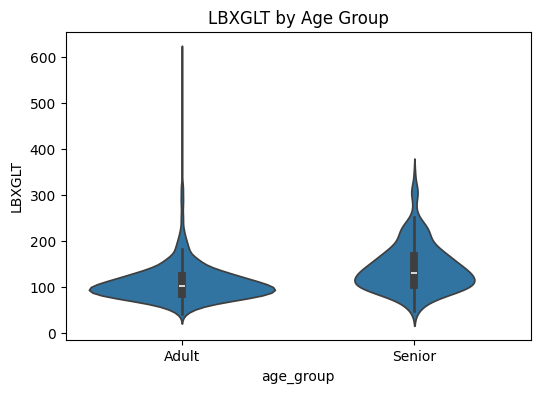

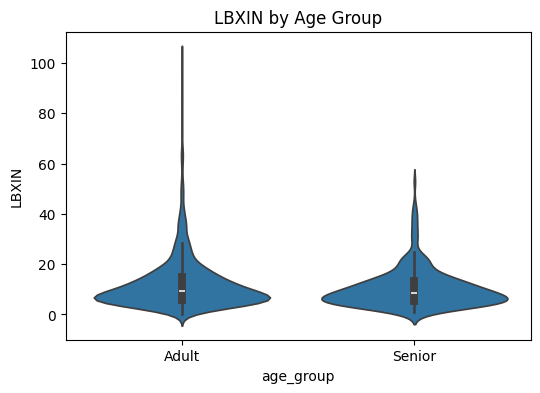

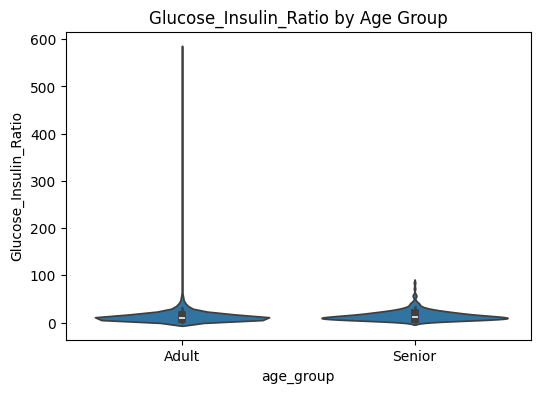

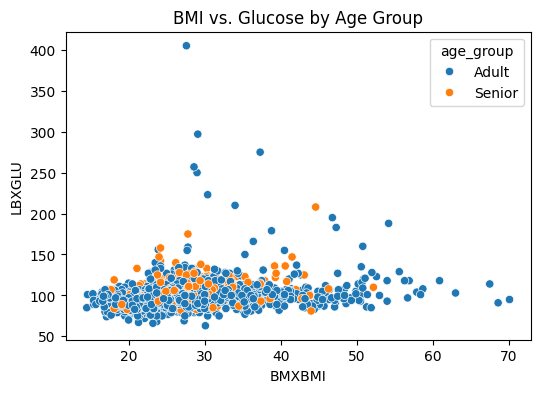

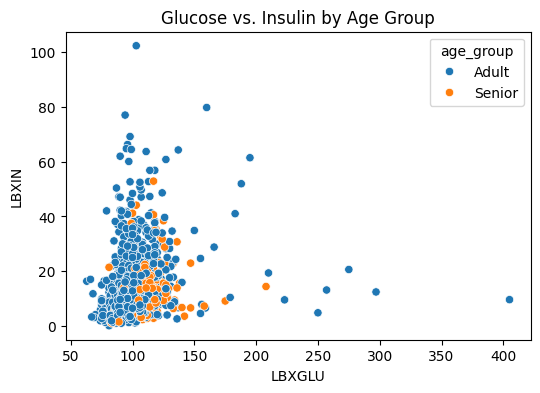

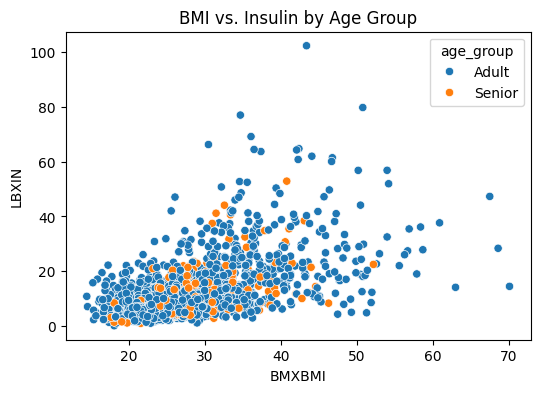

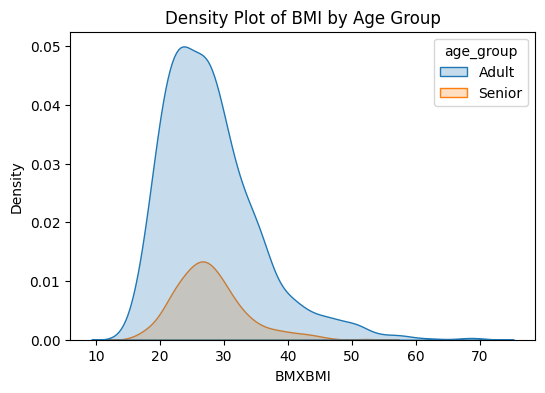

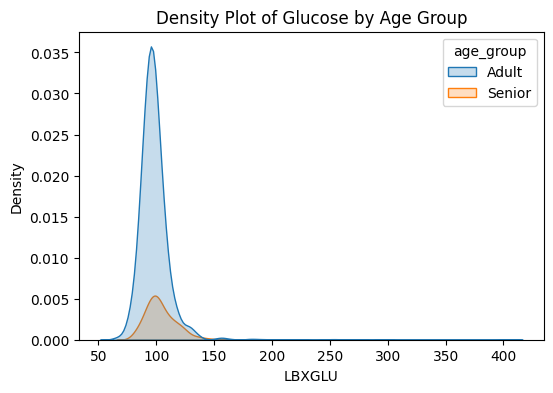

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('Train_Data.csv')

print("Unique values in age_group:", train['age_group'].unique())
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    print(f"Unique values in {col}:", train[col].unique())

def create_features(df):
    df['BMI_cat'] = pd.cut(df['BMXBMI'], bins=[0, 18.5, 25, 30, np.inf],
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    df['Glucose_Insulin_Ratio'] = df['LBXGLU'] / (df['LBXIN'] + 1e-5)
    df['High_Glucose'] = (df['LBXGLU'] > 100).astype(int)
    return df

train = create_features(train)
train['BMI_cat'] = train['BMI_cat'].astype('category').cat.codes

numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'Glucose_Insulin_Ratio']
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010', 'BMI_cat', 'High_Glucose']

plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=train)
plt.title('Distribution of Age Groups')

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[col])
    plt.title(f'Box Plot of {col}')

corr = train[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train)
    plt.title(f'Count Plot of {col}')

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='age_group', data=train)
    plt.title(f'{col} by Age Group')

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='age_group', y=col, data=train)
    plt.title(f'{col} by Age Group')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMXBMI', y='LBXGLU', hue='age_group', data=train)
plt.title('BMI vs. Glucose by Age Group')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='LBXGLU', y='LBXIN', hue='age_group', data=train)
plt.title('Glucose vs. Insulin by Age Group')

plt.figure(figsize=(6, 4))
sns.scatterplot(x='BMXBMI', y='LBXIN', hue='age_group', data=train)
plt.title('BMI vs. Insulin by Age Group')

plt.figure(figsize=(6, 4))
sns.kdeplot(data=train, x='BMXBMI', hue='age_group', fill=True)
plt.title('Density Plot of BMI by Age Group')

plt.figure(figsize=(6, 4))
sns.kdeplot(data=train, x='LBXGLU', hue='age_group', fill=True)
plt.title('Density Plot of Glucose by Age Group')

plt.show()

Missing values in train:
 SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

Missing values in test:
 SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

Train data types:
 SEQN         float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
age_group     object
dtype: object

Test data types:
 SEQN        float64
RIAGENDR    float64
PAQ605      float64
BMXBMI      float64
LBXGLU      float64
DIQ010      float64
LBXGLT      float64
LBXIN       float64
dtype: object


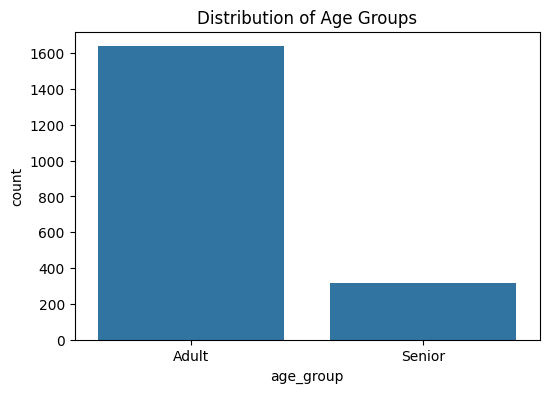

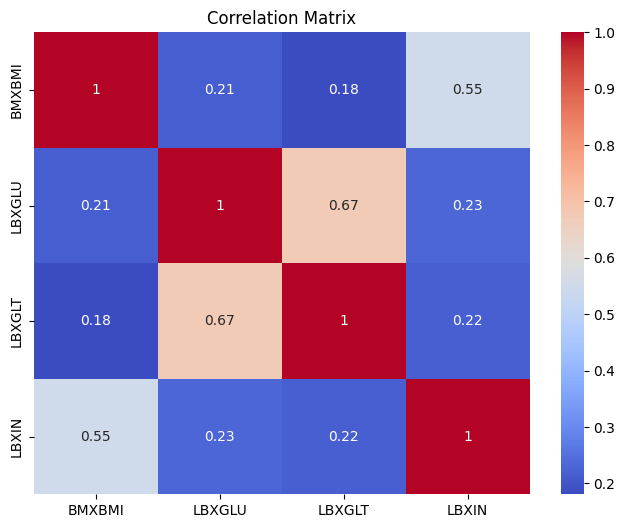


Unique values in RIAGENDR (train): [ 2.  1. nan]
Unique values in RIAGENDR (test): [ 1.  2. nan]

Unique values in PAQ605 (train): [ 2.  1. nan  7.]
Unique values in PAQ605 (test): [ 1.  2. nan]

Unique values in DIQ010 (train): [ 2. nan  1.  3.]
Unique values in DIQ010 (test): [ 2.  1. nan  3.]

Data types in X after conversion:
 RIAGENDR                 float64
PAQ605                   float64
BMXBMI                   float64
LBXGLU                   float64
DIQ010                   float64
LBXGLT                   float64
LBXIN                    float64
BMI_cat                     int8
Glucose_Insulin_Ratio    float64
High_Glucose               int64
dtype: object

Data types in X_test after conversion:
 RIAGENDR                 float64
PAQ605                   float64
BMXBMI                   float64
LBXGLU                   float64
DIQ010                   float64
LBXGLT                   float64
LBXIN                    float64
BMI_cat                     int8
Glucose_Insulin_R

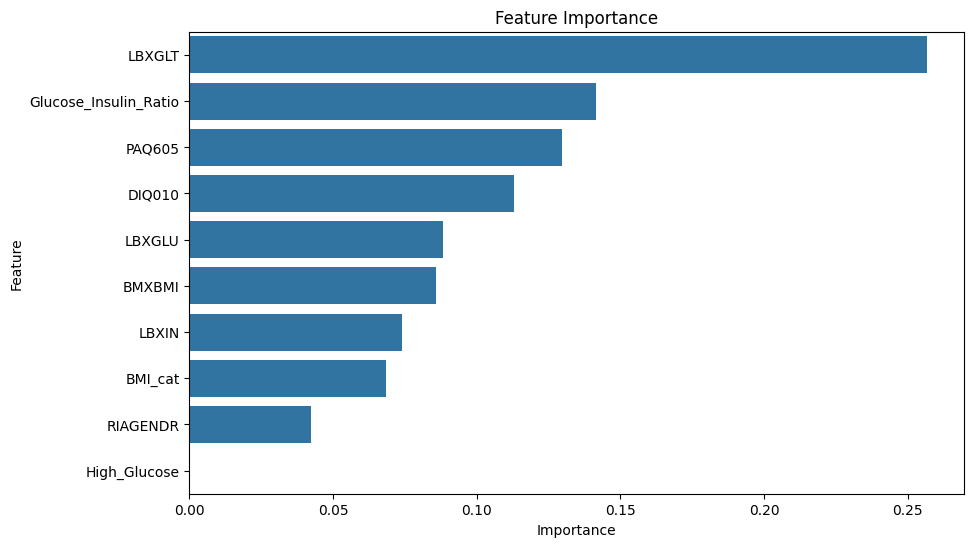

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

print("Missing values in train:\n", train.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())
print("\nTrain data types:\n", train.dtypes)
print("\nTest data types:\n", test.dtypes)

plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=train)
plt.title('Distribution of Age Groups')
plt.show()

numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
plt.figure(figsize=(8, 6))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

def create_features(df):
    df['BMI_cat'] = pd.cut(df['BMXBMI'], bins=[0, 18.5, 25, 30, np.inf],
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    df['Glucose_Insulin_Ratio'] = df['LBXGLU'] / (df['LBXIN'] + 1e-5)
    df['High_Glucose'] = (df['LBXGLU'] > 100).astype(int)
    return df

train = create_features(train)
test = create_features(test)

train['BMI_cat'] = train['BMI_cat'].astype('category').cat.codes
test['BMI_cat'] = test['BMI_cat'].astype('category').cat.codes

features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
            'BMI_cat', 'Glucose_Insulin_Ratio', 'High_Glucose']

X = train[features]
y = train['age_group'].replace({'Adult': 0, 'Senior': 1})
X_test = test[features]

for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    print(f"\nUnique values in {col} (train):", X[col].unique())
    print(f"Unique values in {col} (test):", X_test[col].unique())
    X[col] = pd.to_numeric(X[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

print("\nData types in X after conversion:\n", X.dtypes)
print("\nData types in X_test after conversion:\n", X_test.dtypes)

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'Glucose_Insulin_Ratio']
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010', 'BMI_cat', 'High_Glucose']

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

X = X.astype(float)
X_test = X_test.astype(float)

print("\nFinal data types in X:\n", X.dtypes)
print("\nFinal data types in X_test:\n", X_test.dtypes)

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(f"\nNumber of NaNs in target variable (y) before handling: {y.isnull().sum()}")

if y.isnull().sum() > 0:
    nan_indices = y[y.isnull()].index
    non_nan_indices = y[y.notnull()].index
    X_train_y = X.loc[non_nan_indices]
    y_train_y = y.loc[non_nan_indices]
    X_predict_y = X.loc[nan_indices]
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train_y, y_train_y)
    y_pred_nan = lr.predict(X_predict_y)
    y.loc[nan_indices] = y_pred_nan
    print(f"Imputed {len(nan_indices)} NaN values in target variable (y) using logistic regression.")

print(f"Number of NaNs in target variable (y) after handling: {y.isnull().sum()}")

xgb = XGBClassifier(random_state=42, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, error_score='raise')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
print("\nBest parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print("\nCross-validation ROC AUC scores:", cv_scores)
print("Mean CV ROC AUC:", cv_scores.mean())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:, 1]

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_proba))

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()



In [12]:
test_preds = best_model.predict(X_test)

submission = pd.DataFrame({
    'age_group': test_preds
})

submission

,age_group
0,0
1,0
2,0
3,0
4,0
...,...
307,0
308,0
309,0
310,0


In [13]:
submission['age_group'].value_counts()

,count
age_group,
0,296
1,16


In [14]:
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created: submission.csv")


Submission file created: submission.csv


Missing values in train:
 SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

Missing values in test:
 SEQN        2
RIAGENDR    2
PAQ605      1
BMXBMI      1
LBXGLU      1
DIQ010      1
LBXGLT      2
LBXIN       1
dtype: int64

Train data types:
 SEQN         float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
age_group     object
dtype: object

Test data types:
 SEQN        float64
RIAGENDR    float64
PAQ605      float64
BMXBMI      float64
LBXGLU      float64
DIQ010      float64
LBXGLT      float64
LBXIN       float64
dtype: object


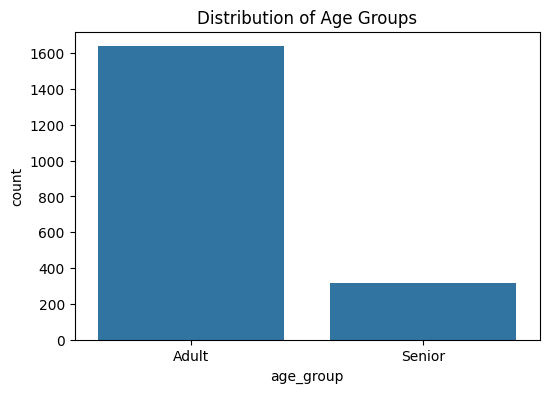

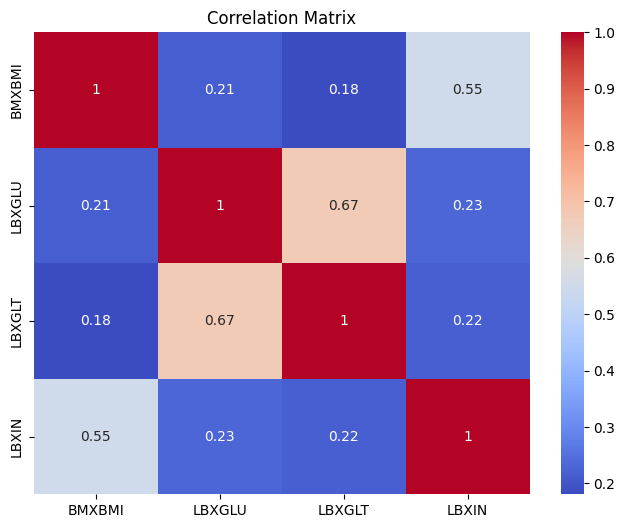


Data types in X after conversion:
 RIAGENDR                   float64
PAQ605                     float64
BMXBMI                     float64
LBXGLU                     float64
DIQ010                     float64
LBXGLT                     float64
LBXIN                      float64
BMI_cat                       int8
Glucose_Insulin_Ratio      float64
High_Glucose                 int64
BMI_Glucose_Interaction    float64
dtype: object

Data types in X_test after conversion:
 RIAGENDR                   float64
PAQ605                     float64
BMXBMI                     float64
LBXGLU                     float64
DIQ010                     float64
LBXGLT                     float64
LBXIN                      float64
BMI_cat                       int8
Glucose_Insulin_Ratio      float64
High_Glucose                 int64
BMI_Glucose_Interaction    float64
dtype: object

Final data types in X:
 RIAGENDR                   float64
PAQ605                     float64
BMXBMI                     flo

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

print("Missing values in train:\n", train.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())
print("\nTrain data types:\n", train.dtypes)
print("\nTest data types:\n", test.dtypes)

plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=train)
plt.title('Distribution of Age Groups')
plt.show()

numerical_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']
plt.figure(figsize=(8, 6))
sns.heatmap(train[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

def create_features(df):
    df['BMI_cat'] = pd.cut(df['BMXBMI'], bins=[0, 18.5, 25, 30, np.inf],
                          labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
    df['Glucose_Insulin_Ratio'] = df['LBXGLU'] / (df['LBXIN'] + 1e-5)
    df['High_Glucose'] = (df['LBXGLU'] > 100).astype(int)
    df['BMI_Glucose_Interaction'] = df['BMXBMI'] * df['LBXGLU']
    return df

train = create_features(train)
test = create_features(test)

train['BMI_cat'] = train['BMI_cat'].astype('category').cat.codes
test['BMI_cat'] = test['BMI_cat'].astype('category').cat.codes

features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN',
            'BMI_cat', 'Glucose_Insulin_Ratio', 'High_Glucose', 'BMI_Glucose_Interaction']

X = train[features]
y = train['age_group'].replace({'Adult': 0, 'Senior': 1})
X_test = test[features]

for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    X[col] = pd.to_numeric(X[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

print("\nData types in X after conversion:\n", X.dtypes)
print("\nData types in X_test after conversion:\n", X_test.dtypes)

num_imputer = KNNImputer(n_neighbors=5)
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'Glucose_Insulin_Ratio', 'BMI_Glucose_Interaction']
cat_cols = ['RIAGENDR', 'PAQ605', 'DIQ010', 'BMI_cat', 'High_Glucose']

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

X = X.astype(float)
X_test = X_test.astype(float)

print("\nFinal data types in X:\n", X.dtypes)
print("\nFinal data types in X_test:\n", X_test.dtypes)

scaler = RobustScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(f"\nNumber of NaNs in target variable (y) before handling: {y.isnull().sum()}")

if y.isnull().sum() > 0:
    nan_indices = y[y.isnull()].index
    non_nan_indices = y[y.notnull()].index
    X_train_y = X.loc[non_nan_indices]
    y_train_y = y.loc[non_nan_indices]
    X_predict_y = X.loc[nan_indices]
    lr = LogisticRegression(random_state=42, class_weight='balanced')
    lr.fit(X_train_y, y_train_y)
    y_pred_nan = lr.predict(X_predict_y)
    y.loc[nan_indices] = y_pred_nan
    print(f"Imputed {len(nan_indices)} NaN values in target variable (y) using logistic regression.")

print(f"Number of NaNs in target variable (y) after handling: {y.isnull().sum()}")

n0 = (y == 0).sum()
n1 = (y == 1).sum()
scale_pos_weight = n0 / n1 if n1 > 0 else 1

xgb = XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1, error_score='raise')
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, error_score='raise')

grid_search_xgb.fit(X, y)
grid_search_rf.fit(X, y)

best_model_xgb = grid_search_xgb.best_estimator_
best_model_rf = grid_search_rf.best_estimator_

print("\nBest XGBoost parameters:", grid_search_xgb.best_params_)
print("Best XGBoost ROC AUC score:", grid_search_xgb.best_score_)
print("\nBest Random Forest parameters:", grid_search_rf.best_params_)
print("Best Random Forest ROC AUC score:", grid_search_rf.best_score_)

cv_scores_xgb = cross_val_score(best_model_xgb, X, y, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(best_model_rf, X, y, cv=5, scoring='roc_auc')
print("\nCross-validation XGBoost ROC AUC scores:", cv_scores_xgb)
print("Mean CV XGBoost ROC AUC:", cv_scores_xgb.mean())
print("\nCross-validation Random Forest ROC AUC scores:", cv_scores_rf)
print("Mean CV Random Forest ROC AUC:", cv_scores_rf.mean())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

best_model_xgb.fit(X_train_res, y_train_res)
best_model_rf.fit(X_train_res, y_train_res)

y_pred_xgb = best_model_xgb.predict(X_val)
y_pred_rf = best_model_rf.predict(X_val)
y_pred_proba_xgb = best_model_xgb.predict_proba(X_val)[:, 1]
y_pred_proba_rf = best_model_rf.predict_proba(X_val)[:, 1]

print("\nXGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))
print("XGBoost ROC AUC Score:", roc_auc_score(y_val, y_pred_proba_xgb))
print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Random Forest ROC AUC Score:", roc_auc_score(y_val, y_pred_proba_rf))

precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_val, y_pred_proba_xgb)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_val, y_pred_proba_rf)
f1_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb + 1e-10)
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-10)
best_threshold_xgb = thresholds_xgb[np.argmax(f1_xgb)]
best_threshold_rf = thresholds_rf[np.argmax(f1_rf)]

y_pred_xgb_adjusted = (y_pred_proba_xgb >= best_threshold_xgb).astype(int)
y_pred_rf_adjusted = (y_pred_proba_rf >= best_threshold_rf).astype(int)

print("\nXGBoost with Adjusted Threshold Classification Report:\n", classification_report(y_val, y_pred_xgb_adjusted))
print("Random Forest with Adjusted Threshold Classification Report:\n", classification_report(y_val, y_pred_rf_adjusted))

test_pred_proba_xgb = best_model_xgb.predict_proba(X_test)[:, 1]
test_pred_proba_rf = best_model_rf.predict_proba(X_test)[:, 1]
test_preds_xgb = (test_pred_proba_xgb >= best_threshold_xgb).astype(int)
test_preds_rf = (test_pred_proba_rf >= best_threshold_rf).astype(int)
final_preds = (test_preds_xgb + test_preds_rf) // 2

submission = pd.DataFrame({
    'age_group': final_preds
})

print(submission['age_group'].value_counts())
submission.to_csv('submission1.csv', index=False)
print("\nSubmission file created: submission.csv")

In [17]:
import pandas as pd
import random

data = {'age_group': [random.choice([0, 1]) for _ in range(312)]}
df = pd.DataFrame(data)
df.to_csv('random_age_groups.csv', index=False)


In [18]:
df['age_group'].value_counts()

,count
age_group,
0,164
1,148


In [20]:
import pandas as pd
import numpy as np

np.random.seed(42)
random_preds = np.random.choice([0, 1], size=312, p=[0.7, 0.3])

submission = pd.DataFrame({
    'age_group': random_preds
})

submission.to_csv('submission_r.csv', index=False)
print(submission['age_group'].value_counts())

age_group
0    218
1     94
Name: count, dtype: int64
